In [1]:
# Installing the Dataset
!pip install medmnist

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.4/88.4 kB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fire: filename=fire-0.6.0-py2.py3-none-any.whl size=117030 sha256=dc3f46b6dde2794f2c9f2d4e15c74e7ee17fa81e32a71a7e7f3e40776df12bc8
  Stored in directory: /root/.cache/pip/wheels/d6/6d/5d/5b73fa0f46d01a793713f8859201361e9e581ced8c75e5c6a3
Successfully built fire


In [2]:
# Import PathMNIST from the medmnist library
import medmnist
from medmnist import PathMNIST

#Load pathMNIST dataset
data_flag='pathmnist'
download = True

#Load the dataset using medmnist's built-in loader
from medmnist import INFO, evaluator

info = INFO[data_flag]
n_classes = len(info['label']) # Number of unique classes

# Preprocess the dataset
train_dataset = medmnist.PathMNIST(split='train', download=download, as_rgb=False)
test_dataset = medmnist.PathMNIST(split='test', download=download, as_rgb=False)

#Convert the datasets to Numpy arrays
X_train, y_train = train_dataset.imgs, train_dataset.labels
X_test, y_test = test_dataset.imgs, test_dataset.labels

# Print the shape of the dataset
print(X_train.shape)

# Print number of classes/labels
print(n_classes)

100%|██████████| 205615438/205615438 [00:16<00:00, 12558621.20it/s]


Using downloaded and verified file: /root/.medmnist/pathmnist.npz
(89996, 28, 28, 3)
9


# **Task 1: Prepare the Dataset**
  **Step 1: Normalize the image pixel values**

In [16]:
X_train_normalized = X_train / 255.0
X_test_normalized = X_test / 255.0


**Step 2: Flatten each image from (28,28,3) to 2352 entires column vector**

In [17]:
X_train_flattened = X_train_normalized.reshape(X_train.shape[0], -1)
X_test_flattened = X_test_normalized.reshape(X_test.shape[0], -1)

# Check new shape
print("New shape of X_train:", X_train_flattened.shape)


New shape of X_train: (89996, 2352)


**Step 3:  Convert the labels into one-hot encoded vectors suitable for classification tasks.**

In [18]:
import numpy as np
# Convert y_train to a 2D array if it's not already (should be shape (89996, 1) if not)
y_train = np.array(y_train).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

# Check new shape
print("New shape of y_train:", y_train.shape )


New shape of y_train: (89996, 1)


In [19]:
from sklearn.preprocessing import OneHotEncoder
# Initialize the one-hot encoder
encoder = OneHotEncoder()

# Fit and transform the labels into one-hot encoded vectors
y_train_one_hot = encoder.fit_transform(y_train).toarray()
y_test_one_hot = encoder.transform(y_test).toarray()

# Check one-hot encoded labels
print("Shape of y_train_one_hot:", y_train_one_hot.shape)
print("First few one-hot encoded labels:\n", y_train_one_hot[:5])

Shape of y_train_one_hot: (89996, 9)
First few one-hot encoded labels:
 [[1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]]


# **Task 2: Build the Baseline Model**
**Define a fully connected neural network model with three hidden layers using Dense and Activation
layers:**


* Hidden Layer 1 - 512 neurons - ReLU

* Hidden Layer 2 - 256 neurons - ReLU

* Hidden Layer 3 - 128 neurons - ReLU

* Output Layer

**Step 1: Create a Sequential model**



In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

model = Sequential()


**Step 2: Add the first hidden layer (512 neurons, ReLU)**


In [8]:
model.add(Dense(512, input_shape=(2352,)))  # Input shape matches the flattened image size
model.add(Activation('relu'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**Step 3: Add the second hidden layer (256 neurons, ReLU)**

In [9]:
model.add(Dense(256))
model.add(Activation('relu'))

**Step 4: Add the third hidden layer (128 neurons, ReLU)**

In [10]:
model.add(Dense(128))
model.add(Activation('relu'))

**Step 5: Add the output layer (number of neurons = num_classes, softmax activation for classification)**

In [11]:
model.add(Dense(n_classes))
model.add(Activation('softmax'))

**Step 6:  Compile the model with the Adam optimizer and a learning rate of 0.001**

In [12]:
import matplotlib.pyplot as plt
import time

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

**Step 7: Train the model using a batch size of 128 and 20 epochs**

In [13]:
start_time = time.time()  # Start timing the training

history = model.fit(X_train_flattened, y_train_one_hot, epochs=20, batch_size=128, validation_split=0.2)

end_time = time.time()  # End timing the training

Epoch 1/20
563/563 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.2599 - loss: 1.9663 - val_accuracy: 0.3943 - val_loss: 1.5937
Epoch 2/20
563/563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.4266 - loss: 1.5234 - val_accuracy: 0.3779 - val_loss: 1.5707
Epoch 3/20
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4913 - loss: 1.3540 - val_accuracy: 0.4930 - val_loss: 1.3251
Epoch 4/20
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5143 - loss: 1.2856 - val_accuracy: 0.5279 - val_loss: 1.2312
Epoch 5/20
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5368 - loss: 1.2266 - val_accuracy: 0.5548 - val_loss: 1.1969
Epoch 6/20
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5491 - loss: 1.1839 - val_accuracy: 0.5389 - val_loss: 1.2230
Epoch 7/20
563/563 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5621 - loss: 1.1445 - val_accuracy: 0.5711 - val_loss: 1.1261
Epoch 8/20
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5694 - loss: 1.1144 - val_accuracy: 0.

**Step 8: Plot the training and validation accuracy/loss curves using matplotlib**

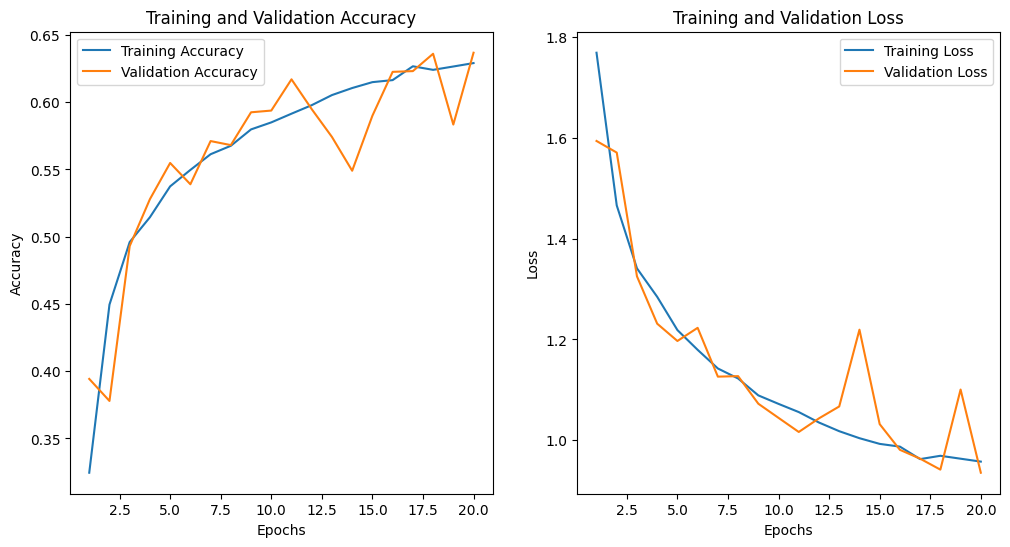

In [14]:
# Extracting history data for plotting
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, 21)

plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

**Step 9:  Evaluate the model on the test set and print the test accuracy as well as the total running time of the training**

In [20]:
test_loss, test_accuracy = model.evaluate(X_test_flattened, y_test_one_hot)

# Calculate total running time
total_time = end_time - start_time

# Print the test accuracy and total training time
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Total Running Time: {total_time:.2f} seconds")


225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6097 - loss: 1.0093
Test Accuracy: 60.54%
Total Running Time: 61.04 seconds


# **Task 3: Fine-tuning and Model Comparisons**
**Model 1: Change the Activation Function**


* Modify the activation function in the output layer from softmax to another activation function.

* Train and evaluate the model.

*  Compare the performance against the baseline.






In [23]:
# Model 1: Using Sigmoid in the Output Layer
model1 = tf.keras.models.Sequential()

# Hidden Layer 1 - 512 neurons, ReLU activation
model1.add(tf.keras.layers.Dense(512, input_shape=(2352,)))
model1.add(tf.keras.layers.Activation('relu'))

# Hidden Layer 2 - 256 neurons, ReLU activation
model1.add(tf.keras.layers.Dense(256))
model1.add(tf.keras.layers.Activation('relu'))

# Hidden Layer 3 - 128 neurons, ReLU activation
model1.add(tf.keras.layers.Dense(128))
model1.add(tf.keras.layers.Activation('relu'))

# Output Layer - Sigmoid Activation (for experiment)
model1.add(tf.keras.layers.Dense(n_classes))
model1.add(tf.keras.layers.Activation('sigmoid'))

In [24]:
# Compile Model 1 with Adam optimizer and a learning rate of 0.001
model1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               loss='categorical_crossentropy',
               metrics=['accuracy'])

In [25]:
# Train Model 1
start_time_model1 = time.time()
history1 = model1.fit(X_train_flattened, y_train_one_hot, epochs=20, batch_size=128, validation_split=0.2)
end_time_model1 = time.time()

# Evaluate Model 1
test_loss1, test_accuracy1 = model1.evaluate(X_test_flattened, y_test_one_hot)
total_time_model1 = end_time_model1 - start_time_model1

print(f"Test Accuracy (Sigmoid): {test_accuracy1 * 100:.2f}%")
print(f"Total Training Time: {total_time_model1:.2f} seconds")

Epoch 1/20
563/563 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.2664 - loss: 1.9176 - val_accuracy: 0.4301 - val_loss: 1.5136
Epoch 2/20
563/563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.4456 - loss: 1.4700 - val_accuracy: 0.4635 - val_loss: 1.4346
Epoch 3/20
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4870 - loss: 1.3671 - val_accuracy: 0.4683 - val_loss: 1.3943
Epoch 4/20
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5069 - loss: 1.3173 - val_accuracy: 0.5059 - val_loss: 1.2869
Epoch 5/20
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5195 - loss: 1.2789 - val_accuracy: 0.5317 - val_loss: 1.2086
Epoch 6/20
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5320 - loss: 1.2388 - val_accuracy: 0.5416 - val_loss: 1.1927
Epoch 7/20
563/563 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5429 - loss: 1.1978 - val_accuracy: 0.5435 - val_loss: 1.1951
Epoch 8/20
563/563 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5535 - loss: 1.1666 - val_accuracy: 0.

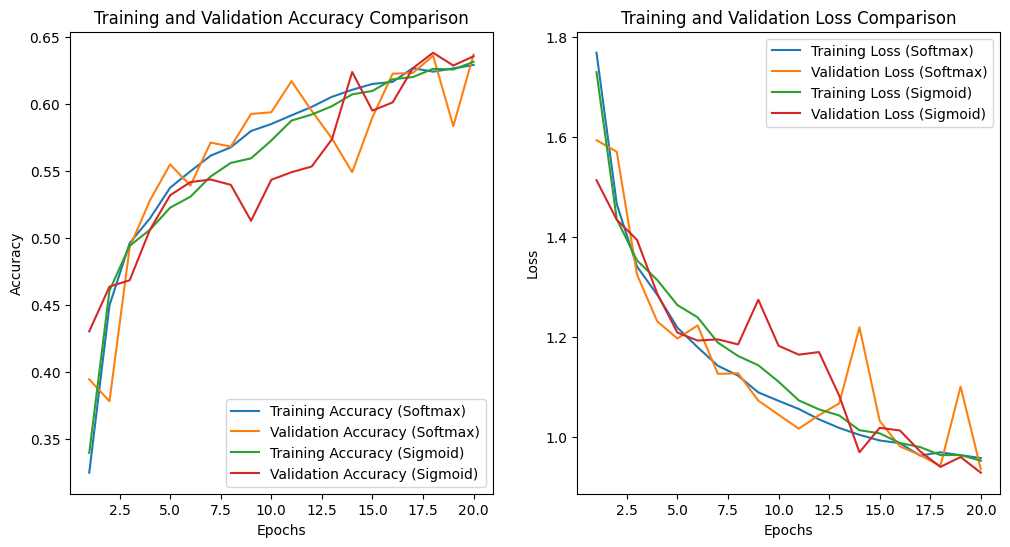


Comparison of Models:
Test Accuracy (Softmax): 60.54%
Test Accuracy (Sigmoid): 58.02%
Total Training Time (Softmax): 61.04 seconds
Total Training Time (Sigmoid): 61.85 seconds


In [27]:
# Plot Training and Validation Accuracy/Loss for both models
epochs_range = range(1, 21)

# Original model metrics
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Model 1 metrics
acc1 = history1.history['accuracy']
val_acc1 = history1.history['val_accuracy']
loss1 = history1.history['loss']
val_loss1 = history1.history['val_loss']

plt.figure(figsize=(12, 6))

# Accuracy comparison plot
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy (Softmax)')
plt.plot(epochs_range, val_acc, label='Validation Accuracy (Softmax)')
plt.plot(epochs_range, acc1, label='Training Accuracy (Sigmoid)')
plt.plot(epochs_range, val_acc1, label='Validation Accuracy (Sigmoid)')
plt.title('Training and Validation Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss comparison plot
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss (Softmax)')
plt.plot(epochs_range, val_loss, label='Validation Loss (Softmax)')
plt.plot(epochs_range, loss1, label='Training Loss (Sigmoid)')
plt.plot(epochs_range, val_loss1, label='Validation Loss (Sigmoid)')
plt.title('Training and Validation Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Compare the performance of both models
print("\nComparison of Models:")
print(f"Test Accuracy (Softmax): {test_accuracy * 100:.2f}%")
print(f"Test Accuracy (Sigmoid): {test_accuracy1 * 100:.2f}%")
print(f"Total Training Time (Softmax): {total_time:.2f} seconds")
print(f"Total Training Time (Sigmoid): {total_time_model1:.2f} seconds")

**Model 2: Change the Learning Rate**
* Modify the learning rate of the Adam optimizer from 0.001 to a different value

* Train and evaluate the model.

*  Compare the performance against the baseline.



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
563/563 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.2544 - loss: 1.9473 - val_accuracy: 0.3958 - val_loss: 1.6248
Epoch 2/20
563/563 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3970 - loss: 1.6184 - val_accuracy: 0.4294 - val_loss: 1.5378
Epoch 3/20
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4379 - loss: 1.5054 - val_accuracy: 0.4718 - val_loss: 1.4289
Epoch 4/20
563/563 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4727 - loss: 1.4233 - val_accuracy: 0.4847 - val_loss: 1.3697
Epoch 5/20
563/563 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4870 - loss: 1.3737 - val_accuracy: 0.4969 - val_loss: 1.3401
Epoch 6/20
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4948 - loss: 1.3460 - val_accuracy: 0.5042 - val_loss: 1.3306
Epoch 7/20
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5097 - loss: 1.3139 - val_accuracy: 0.4964 - val_loss: 1.3765
Epoch 8/20
563/563 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5229 - loss: 1.2857 - val_accuracy: 0.

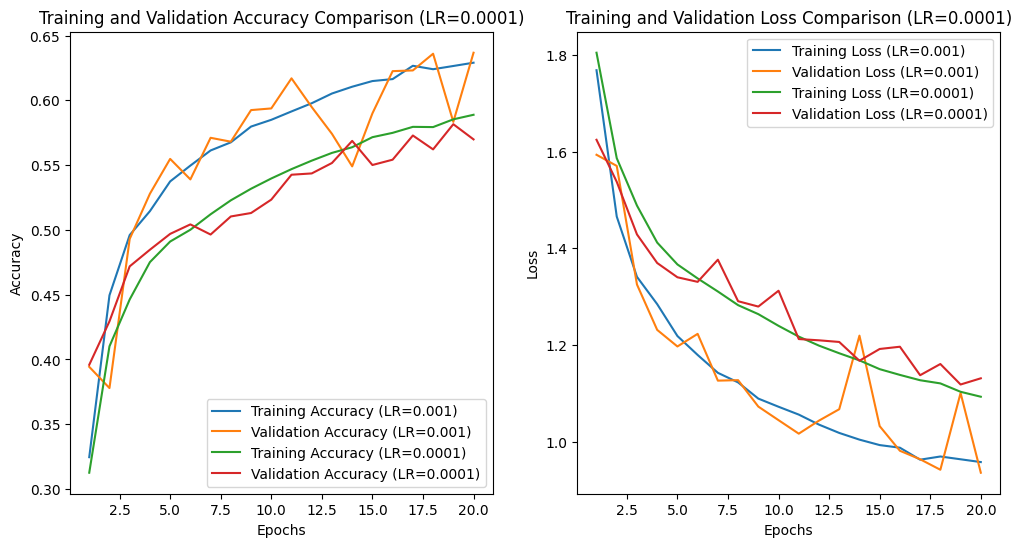


Comparison of Models:
Test Accuracy (LR=0.001): 60.54%
Test Accuracy (LR=0.0001): 59.15%
Total Training Time (LR=0.001): 61.04 seconds
Total Training Time (LR=0.0001): 50.69 seconds


In [29]:
import tensorflow as tf
import time
import matplotlib.pyplot as plt

# Model 2: Changing the learning rate to 0.0001 (you can adjust it as needed)
learning_rate_new = 0.0001

model2 = tf.keras.models.Sequential()

# Hidden Layer 1 - 512 neurons, ReLU activation
model2.add(tf.keras.layers.Dense(512, input_shape=(2352,)))
model2.add(tf.keras.layers.Activation('relu'))

# Hidden Layer 2 - 256 neurons, ReLU activation
model2.add(tf.keras.layers.Dense(256))
model2.add(tf.keras.layers.Activation('relu'))

# Hidden Layer 3 - 128 neurons, ReLU activation
model2.add(tf.keras.layers.Dense(128))
model2.add(tf.keras.layers.Activation('relu'))

# Output Layer - Softmax Activation (for multi-class classification)
model2.add(tf.keras.layers.Dense(n_classes))
model2.add(tf.keras.layers.Activation('softmax'))

# Compile Model 2 with Adam optimizer and the modified learning rate
model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate_new),
               loss='categorical_crossentropy',
               metrics=['accuracy'])

# Step 2: Train Model 2
start_time_model2 = time.time()
history2 = model2.fit(X_train_flattened, y_train_one_hot, epochs=20, batch_size=128, validation_split=0.2)
end_time_model2 = time.time()

# Evaluate Model 2
test_loss2, test_accuracy2 = model2.evaluate(X_test_flattened, y_test_one_hot)
total_time_model2 = end_time_model2 - start_time_model2

print(f"Test Accuracy (Learning Rate {learning_rate_new}): {test_accuracy2 * 100:.2f}%")
print(f"Total Training Time (Learning Rate {learning_rate_new}): {total_time_model2:.2f} seconds")

# Step 3: Plot Training and Validation Accuracy/Loss for both models (original vs Model 2)
epochs_range = range(1, 21)

# Original model metrics (already trained earlier)
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Model 2 metrics
acc2 = history2.history['accuracy']
val_acc2 = history2.history['val_accuracy']
loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']

plt.figure(figsize=(12, 6))

# Accuracy comparison plot
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy (LR=0.001)')
plt.plot(epochs_range, val_acc, label='Validation Accuracy (LR=0.001)')
plt.plot(epochs_range, acc2, label=f'Training Accuracy (LR={learning_rate_new})')
plt.plot(epochs_range, val_acc2, label=f'Validation Accuracy (LR={learning_rate_new})')
plt.title(f'Training and Validation Accuracy Comparison (LR={learning_rate_new})')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss comparison plot
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss (LR=0.001)')
plt.plot(epochs_range, val_loss, label='Validation Loss (LR=0.001)')
plt.plot(epochs_range, loss2, label=f'Training Loss (LR={learning_rate_new})')
plt.plot(epochs_range, val_loss2, label=f'Validation Loss (LR={learning_rate_new})')
plt.title(f'Training and Validation Loss Comparison (LR={learning_rate_new})')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Step 4: Compare the performance of both models
print("\nComparison of Models:")
print(f"Test Accuracy (LR=0.001): {test_accuracy * 100:.2f}%")
print(f"Test Accuracy (LR={learning_rate_new}): {test_accuracy2 * 100:.2f}%")
print(f"Total Training Time (LR=0.001): {total_time:.2f} seconds")
print(f"Total Training Time (LR={learning_rate_new}): {total_time_model2:.2f} seconds")


**Model 3: Change the Optimizer**
* Replace the Adam optimizer with a different optimizer

* Train and evaluate the model.

*  Compare the performance against the baseline.

Epoch 1/20
563/563 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.2282 - loss: 2.0238 - val_accuracy: 0.3894 - val_loss: 1.7013
Epoch 2/20
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3793 - loss: 1.6751 - val_accuracy: 0.4096 - val_loss: 1.5825
Epoch 3/20
563/563 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4175 - loss: 1.5713 - val_accuracy: 0.4419 - val_loss: 1.5090
Epoch 4/20
563/563 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4409 - loss: 1.5065 - val_accuracy: 0.4581 - val_loss: 1.4551
Epoch 5/20
563/563 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4687 - loss: 1.4427 - val_accuracy: 0.4644 - val_loss: 1.4075
Epoch 6/20
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4873 - loss: 1.3802 - val_accuracy: 0.5077 - val_loss: 1.3286
Epoch 7/20
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4992 - loss: 1.3428 - val_accuracy: 0.5018 - val_loss: 1.3262
Epoch 8/20
563/563 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5122 - loss: 1.3106 - val_accuracy: 0.

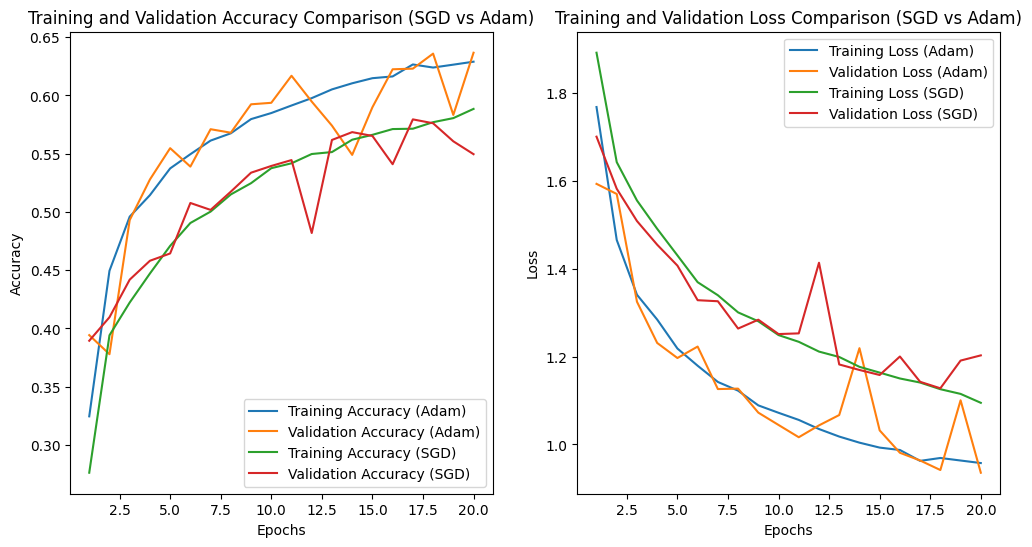


Comparison of Models:
Test Accuracy (Adam): 60.54%
Test Accuracy (SGD): 58.93%
Total Training Time (Adam): 61.04 seconds
Total Training Time (SGD): 50.73 seconds


In [30]:
import tensorflow as tf
import time
import matplotlib.pyplot as plt

# Model 3: Replacing Adam optimizer with SGD optimizer
optimizer_new = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)

model3 = tf.keras.models.Sequential()

# Hidden Layer 1 - 512 neurons, ReLU activation
model3.add(tf.keras.layers.Dense(512, input_shape=(2352,)))
model3.add(tf.keras.layers.Activation('relu'))

# Hidden Layer 2 - 256 neurons, ReLU activation
model3.add(tf.keras.layers.Dense(256))
model3.add(tf.keras.layers.Activation('relu'))

# Hidden Layer 3 - 128 neurons, ReLU activation
model3.add(tf.keras.layers.Dense(128))
model3.add(tf.keras.layers.Activation('relu'))

# Output Layer - Softmax Activation (for multi-class classification)
model3.add(tf.keras.layers.Dense(n_classes))
model3.add(tf.keras.layers.Activation('softmax'))

# Compile Model 3 with SGD optimizer and momentum
model3.compile(optimizer=optimizer_new,
               loss='categorical_crossentropy',
               metrics=['accuracy'])

# Step 2: Train Model 3
start_time_model3 = time.time()
history3 = model3.fit(X_train_flattened, y_train_one_hot, epochs=20, batch_size=128, validation_split=0.2)
end_time_model3 = time.time()

# Evaluate Model 3
test_loss3, test_accuracy3 = model3.evaluate(X_test_flattened, y_test_one_hot)
total_time_model3 = end_time_model3 - start_time_model3

print(f"Test Accuracy (SGD): {test_accuracy3 * 100:.2f}%")
print(f"Total Training Time (SGD): {total_time_model3:.2f} seconds")

# Step 3: Plot Training and Validation Accuracy/Loss for both models (original vs Model 3)
epochs_range = range(1, 21)

# Original model metrics (already trained earlier)
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Model 3 metrics
acc3 = history3.history['accuracy']
val_acc3 = history3.history['val_accuracy']
loss3 = history3.history['loss']
val_loss3 = history3.history['val_loss']

plt.figure(figsize=(12, 6))

# Accuracy comparison plot
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy (Adam)')
plt.plot(epochs_range, val_acc, label='Validation Accuracy (Adam)')
plt.plot(epochs_range, acc3, label='Training Accuracy (SGD)')
plt.plot(epochs_range, val_acc3, label='Validation Accuracy (SGD)')
plt.title('Training and Validation Accuracy Comparison (SGD vs Adam)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss comparison plot
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss (Adam)')
plt.plot(epochs_range, val_loss, label='Validation Loss (Adam)')
plt.plot(epochs_range, loss3, label='Training Loss (SGD)')
plt.plot(epochs_range, val_loss3, label='Validation Loss (SGD)')
plt.title('Training and Validation Loss Comparison (SGD vs Adam)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Step 4: Compare the performance of both models
print("\nComparison of Models:")
print(f"Test Accuracy (Adam): {test_accuracy * 100:.2f}%")
print(f"Test Accuracy (SGD): {test_accuracy3 * 100:.2f}%")
print(f"Total Training Time (Adam): {total_time:.2f} seconds")
print(f"Total Training Time (SGD): {total_time_model3:.2f} seconds")


**Model 4: Increase the Number of Trainable Parameters**

* Increase considerably the number of weights and biases in the neural network.

* Train and evaluate the model.

*  Compare the performance against the baseline.

Epoch 1/20
563/563 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.2627 - loss: 1.9319 - val_accuracy: 0.3706 - val_loss: 1.6551
Epoch 2/20
563/563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4183 - loss: 1.5389 - val_accuracy: 0.4591 - val_loss: 1.4357
Epoch 3/20
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5078 - loss: 1.2959 - val_accuracy: 0.2314 - val_loss: 2.2014
Epoch 4/20
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5216 - loss: 1.2525 - val_accuracy: 0.4827 - val_loss: 1.4248
Epoch 5/20
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5625 - loss: 1.1413 - val_accuracy: 0.6014 - val_loss: 1.0335
Epoch 6/20
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5771 - loss: 1.0881 - val_accuracy: 0.5886 - val_loss: 1.0555
Epoch 7/20
563/563 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5977 - loss: 1.0329 - val_accuracy: 0.6202 - val_loss: 0.9733
Epoch 8/20
563/563 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6006 - loss: 1.0290 - val_accuracy: 0.

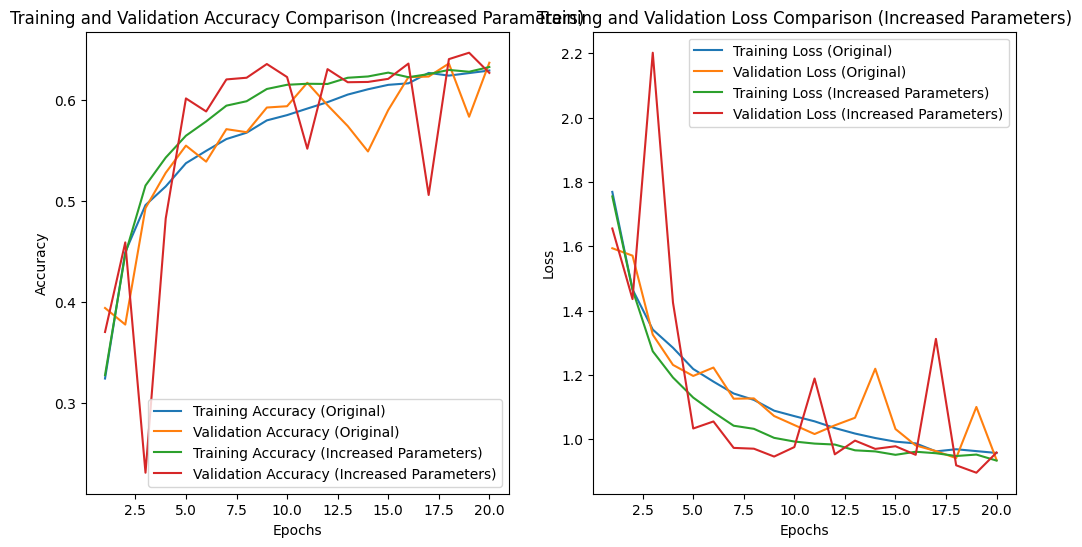


Comparison of Models:
Test Accuracy (Original): 60.54%
Test Accuracy (Increased Parameters): 57.17%
Total Training Time (Original): 61.04 seconds
Total Training Time (Increased Parameters): 62.28 seconds


In [32]:
import tensorflow as tf
import time
import matplotlib.pyplot as plt

# Model 4: Increasing the number of trainable parameters by adding more layers and neurons
model4 = tf.keras.models.Sequential()

# Increased number of neurons in hidden layers
# Hidden Layer 1 - 1024 neurons, ReLU activation
model4.add(tf.keras.layers.Dense(1024, input_shape=(2352,)))
model4.add(tf.keras.layers.Activation('relu'))

# Hidden Layer 2 - 512 neurons, ReLU activation
model4.add(tf.keras.layers.Dense(512))
model4.add(tf.keras.layers.Activation('relu'))

# Hidden Layer 3 - 512 neurons, ReLU activation
model4.add(tf.keras.layers.Dense(512))
model4.add(tf.keras.layers.Activation('relu'))

# Hidden Layer 4 - 256 neurons, ReLU activation
model4.add(tf.keras.layers.Dense(256))
model4.add(tf.keras.layers.Activation('relu'))

# Hidden Layer 5 - 128 neurons, ReLU activation
model4.add(tf.keras.layers.Dense(128))
model4.add(tf.keras.layers.Activation('relu'))

# Output Layer - Softmax Activation (for multi-class classification)
model4.add(tf.keras.layers.Dense(n_classes))
model4.add(tf.keras.layers.Activation('softmax'))

# Compile Model 4 with Adam optimizer and the same learning rate
model4.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               loss='categorical_crossentropy',
               metrics=['accuracy'])

# Step 2: Train Model 4
start_time_model4 = time.time()
history4 = model4.fit(X_train_flattened, y_train_one_hot, epochs=20, batch_size=128, validation_split=0.2)
end_time_model4 = time.time()

# Evaluate Model 4
test_loss4, test_accuracy4 = model4.evaluate(X_test_flattened, y_test_one_hot)
total_time_model4 = end_time_model4 - start_time_model4

print(f"Test Accuracy (Increased Parameters): {test_accuracy4 * 100:.2f}%")
print(f"Total Training Time (Increased Parameters): {total_time_model4:.2f} seconds")

# Step 3: Plot Training and Validation Accuracy/Loss for both models (original vs Model 4)
epochs_range = range(1, 21)

# Original model metrics (already trained earlier)
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Model 4 metrics
acc4 = history4.history['accuracy']
val_acc4 = history4.history['val_accuracy']
loss4 = history4.history['loss']
val_loss4 = history4.history['val_loss']

plt.figure(figsize=(12, 6))

# Accuracy comparison plot
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy (Original)')
plt.plot(epochs_range, val_acc, label='Validation Accuracy (Original)')
plt.plot(epochs_range, acc4, label='Training Accuracy (Increased Parameters)')
plt.plot(epochs_range, val_acc4, label='Validation Accuracy (Increased Parameters)')
plt.title('Training and Validation Accuracy Comparison (Increased Parameters)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss comparison plot
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss (Original)')
plt.plot(epochs_range, val_loss, label='Validation Loss (Original)')
plt.plot(epochs_range, loss4, label='Training Loss (Increased Parameters)')
plt.plot(epochs_range, val_loss4, label='Validation Loss (Increased Parameters)')
plt.title('Training and Validation Loss Comparison (Increased Parameters)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Step 4: Compare the performance of both models
print("\nComparison of Models:")
print(f"Test Accuracy (Original): {test_accuracy * 100:.2f}%")
print(f"Test Accuracy (Increased Parameters): {test_accuracy4 * 100:.2f}%")
print(f"Total Training Time (Original): {total_time:.2f} seconds")
print(f"Total Training Time (Increased Parameters): {total_time_model4:.2f} seconds")


# **Task 4: Detailed table comparing the performance of all four models.**

In [33]:
import pandas as pd

# Create the data for the table
data = {
    "Baseline": ["Softmax", "0.001", "1.3M", "Adam", f"{test_accuracy * 100:.2f}%", f"{total_time:.2f} seconds"],
    "Model A (Sigmoid)": ["Softmax", "0.001", "1.3M", "Adam", f"{test_accuracy1 * 100:.2f}%", f"{total_time_model1:.2f} seconds"],
    "Model B (LR=0.0001)": ["Softmax", "0.0001", "1.3M", "Adam", f"{test_accuracy2 * 100:.2f}%", f"{total_time_model2:.2f} seconds"],
    "Model C (SGD)": ["Softmax", "0.001", "1.3M", "SGD", f"{test_accuracy3 * 100:.2f}%", f"{total_time_model3:.2f} seconds"],
    "Model D (Increased Parameters)": ["Softmax", "0.001", "1.3M+", "Adam", f"{test_accuracy4 * 100:.2f}%", f"{total_time_model4:.2f} seconds"]
}

# Define the index (rows)
index = ["Activation Function", "Learning Rate", "Trainable Parameters", "Optimizer", "Test Accuracy", "Running Time"]

# Create the DataFrame
df = pd.DataFrame(data, index=index)

# Display the table
df


,Baseline,Model A (Sigmoid),Model B (LR=0.0001),Model C (SGD),Model D (Increased Parameters)
Activation Function,Softmax,Softmax,Softmax,Softmax,Softmax
Learning Rate,0.001,0.001,0.0001,0.001,0.001
Trainable Parameters,1.3M,1.3M,1.3M,1.3M,1.3M+
Optimizer,Adam,Adam,Adam,SGD,Adam
Test Accuracy,60.54%,58.02%,59.15%,58.93%,57.17%
Running Time,61.04 seconds,61.85 seconds,50.69 seconds,50.73 seconds,62.28 seconds
